<a href="https://colab.research.google.com/github/Astrocitos/Advanced-ML-Practices/blob/main/TC4033_Activity1b_ID40.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC 5033: Advanced Machine Learning Methods**

## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


##**Lead Professor**

##Dr. Jose Antonio Cantoral-Ceballos



##**Asistant Professor**

##Dr. Carlos Villaseñor


#**Team 40**

##**Members:**

##Iossif Moises Palli Laura                  A01794457

##Astrid Rosario Bernaga Torres              A01793080

##Cecilia Acevedo Rodríguez                  A01793953

##Fredy Reyes Sánchez                        A01687370

# Introduction: American Sign Language (ASL) Hand Sign Recognition

## Problem Statement

The American Sign Language (ASL) is a vital means of communication for individuals with hearing impairments. Recognizing ASL hand signs through computer vision and machine learning can open up new possibilities for bridging communication gaps. In this project, our goal is to develop a machine learning model that can accurately classify ASL hand signs based on images.

## ASL Dataset

We are working with the ASL dataset, which consists of grayscale images of hand signs representing letters of the alphabet (A-Z) and digits (0-9). Each image is 28x28 pixels, resulting in a total of 24 unique classes (A-Z excluding J and Z). The dataset has been divided into training and validation sets.

### Dataset Overview:

- Number of Classes: 24
- Image Size: 28x28 pixels
- Total Samples: Training Set (27,455 samples), Validation Set (7,172 samples)
- Labels: Each image is labeled with the corresponding ASL letter or digit.

## Goals of the Code

In this Jupyter Notebook, we aim to achieve the following goals:

1. Data Preprocessing: Prepare and preprocess the ASL dataset for model training. This includes data normalization, splitting into validation and test sets, and exploring the dataset.

2. Model Architecture: Define and implement a deep learning model architecture that can effectively learn and classify ASL hand signs.

3. Model Training: Train the model using the training dataset and monitor its performance on the validation set. Implement training routines, including forward and backward passes.

4. Evaluation: Evaluate the trained model on the test dataset to assess its accuracy in ASL hand sign recognition.

5. Documentation: Provide detailed explanations, equations, and justifications to ensure code understanding and transparency.

Let's begin by exploring the ASL dataset and preparing it for model training.

## Importing Libraries:

In [1]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline

## Mounting Google Drive:

In [2]:
# Import the drive module from the google.colab library
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define the directory path where the ASL dataset is located in Google Drive
DIR = "/content/drive/MyDrive/Tarea 1b/asl_data"

# Change the current working directory to the specified directory path
os.chdir(DIR)

## Reading CSV Files:
It reads two CSV files, 'sign_mnist_train.csv' and 'sign_mnist_valid.csv', using pandas and stores them in train_df and valid_df, respectively.

In [4]:
#Load the ASL daataset and preprocess it
train_df = pd.read_csv(os.path.join(DIR, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DIR, 'sign_mnist_valid.csv'))

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


## Data Preparation:
This code extracts labels ('label' column) from the data, deletes the 'label' column from the DataFrames, and converts the remaining data to NumPy arrays.

### Import Images

In [6]:
#Extract labels and features
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

### Splitting Validation and Test Data:
This function split_val_test is defined to split the validation data into validation and test sets. It takes a percentage (pct) as an argument for the test set size.

In [7]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Split the dataset into validation and test sets.

    Args:
    - x: Input data.
    - y: Labels.
    - pct: Percentage of data to allocate to the validation set.
    - shuffle: Whether to shuffle the data (default is True).

    Returns:
    - x_val: Validation data.
    - y_val: Validation labels.
    - x_test: Test data.
    - y_test: Test labels.
    '''
    num_samples = len(x)
    num_test_samples = int(pct * num_samples)

    # Optionally shuffle the data before splitting.
    if shuffle:
        index = np.arange(num_samples)
        np.random.shuffle(index)
        x = x[index]
        y = y[index]

    # Split the data into validation and test sets.
    x_val = x[:num_test_samples]
    y_val = y[:num_test_samples]
    x_test = x[num_test_samples:]
    y_test = y[num_test_samples:]

    return x_val, y_val, x_test, y_test

In [8]:
#Split the validation set into validation and test sets
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [9]:
### The following

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise
This code calculates mean and standard deviation for the training data and then normalizes the training, validation, and test data based on these statistics.

In [10]:
def normalise(x_mean, x_std, x_data):
    return (x_data - x_mean) / x_std

In [11]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [12]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

In [13]:
x_val.mean(), x_val.std()

(0.018859891, 1.0040632)

In [14]:
x_test.mean(), x_test.std()

(0.033644557, 1.0070765)

### Plotting a Sample Image:
This function plot_number is defined to plot a single image from the dataset. It reshapes the image and displays it using matplotlib.

In [15]:
def plot_number(image):
    plt.figure(figsize=(5,5))
    image = image.reshape((28, 28))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

### Random Image and Prediction:
It selects a random index from the test set, plots the corresponding image, and makes a prediction using the trained model.

The sample image represents a: 20


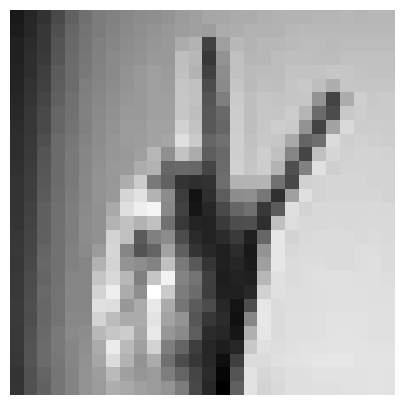

In [16]:
rnd_idx = np.random.randint(len(y_test))
print(f'The sample image represents a: {y_test[rnd_idx]}')
plot_number(x_test[rnd_idx])

###Equations for Our Model


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

####$z^1 = W^1 X + b^1$: Linear transformation of input data.

$z^1$ is the output of the first layer of neurons, calculated by multiplying the input data $X$ by weights $W^1$ and adding biases $b^1$.

####$a^1 = ReLU(z^1)$: Applying the Rectified Linear Unit (ReLU) activation function.

$a^1$ is the output of the first layer after applying an activation function called ReLU (Rectified Linear Unit) to $z^1$. ReLU introduces non-linearity into the model, allowing some neurons to activate (take values different from zero) while others don't.

####$z^2 = W^2 a^1 + b^2$: linear transformation.

$z^2$ is the output of the second layer of neurons, taking the output $a^1$ of the first layer as input. Similar to the first layer, it's calculated by multiplying by weights $W^2$ and adding biases $b^2$.

####$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$: Softmax function for probability distribution.

$\hat{y}$ represents the model's predictions. It's calculated using a function called Softmax, which takes the outputs $z^2$ and computes the probability that the input data belongs to each of the classes. In other words, it calculates the probability distribution over the classes.

####$\mathcal{L}(\hat{y}^{i}, y^{i}) = - y^{i} \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$: Cross-entropy loss.

This equation represents the loss function, which measures how well the predictions align with the actual values. In this case, Categorical Cross-Entropy is used as the loss function. The idea is to penalize incorrect predictions and reward correct ones

####$\mathcal{J}(w, b) = \frac{1}{num_samples} \sum_{i=1}^{num_samples}-\ln(\hat{y}^{i})$: Overall cost.

$\mathcal{J}(w, b)$ is the cost function, which is the average of the loss over the entire dataset. The goal during model training is to minimize this cost function by adjusting the weights ($w$) and biases ($b$) of the layers.

#### Mini batches

In [17]:
def create_minibatches(mb_size, x, y, shuffle=True):
    '''
    Create mini-batches from a dataset.

    Parameters:
    - mb_size: Mini-batch size (number of samples per mini-batch).
    - x: Input data (samples), shape (num_samples, num_features).
    - y: Corresponding labels, shape (num_samples,).
    - shuffle: Whether to shuffle the data before creating mini-batches (default is True).

    Returns:
    - Generator that yields mini-batches of data and labels as tuples.
    '''
    assert x.shape[0] == y.shape[0], 'Number of samples in x and y must match.'
    total_data = x.shape[0]
    assert mb_size > 0 and (mb_size & (mb_size - 1)) == 0, 'Mini-batch size must be a power of 2.'

    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]

    return ((x[i:i + mb_size], y[i:i + mb_size]) for i in range(0, total_data, mb_size))

### Definition of Linear, ReLU, and Sequential Layers:
These classes are defined to create a simple neural network model.

In [18]:
class np_tensor(np.ndarray):
    '''Custom NumPy array subclass for tensors.'''
    pass

###  The Linear class initializes
the parameters (weights and biases) using the Kaiming He initialization method. It also defines the forward and backward (gradient computation) operations for a linear layer.

In [19]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Initialize parameters using Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)

    def __call__(self, X): # This is the forward method of the Linear class.
        Z = self.W @ X + self.b
        return Z

    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)

### Definition of ReLU Layer:
The ReLU class defines the ReLU activation function and its backward operation to compute gradients.

In [20]:
class ReLU():
    def __call__(self, Z):
        # ReLU activation: Set negative values to zero.
        return np.maximum(0, Z)

    def backward(self, Z, A):
        # Backward pass for ReLU: Propagate gradients where input was positive.
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Definition of Sequential Layer:
The Sequential_layers class is used to create a sequential stack of linear and ReLU layers. It tracks intermediate outputs and defines forward, backward, and update operations.

In [21]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        Initialize a sequential neural network with a list of layers.

        Args:
        - layers: List containing objects of type Linear and ReLU.
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}

    def __call__(self, X):
        '''
        Perform a forward pass through the network.

        Args:
        - X: Input data.

        Returns:
        - Output of the network after the forward pass.
        '''
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l' + str(i)] = self.x
        return self.x

    def backward(self):
        '''
        Perform a backward pass through the network to compute gradients.
        '''
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l' + str(i)], self.outputs['l' + str(i + 1)])

    def update(self, learning_rate=1e-4):
        '''
        Update network parameters using gradient descent.

        Args:
        - learning_rate: Learning rate for gradient descent.
        '''
        for layer in self.layers:
            if isinstance(layer, ReLU):
                continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad

    def predict(self, X):
        '''
        Make predictions on new data.

        Args:
        - X: Input data for predictions.

        Returns:
        - Predicted class label.
        '''
        return np.argmax(self.__call__(X))

### Definition of Cost Function (Softmax Cross-Entropy):
The softmaxXEntropy function computes the softmax probabilities, calculates the cross-entropy loss, and computes gradients.

In [22]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    #Exponentials of input values
    exp_scores = np.exp(x)

    #Calculate softmax probabilities
    probs = exp_scores / exp_scores.sum(axis = 0)

    #Make a copy of predicted probabilities
    preds = probs.copy()

    # Cost
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size

    # Gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Training Loop:
The train function trains the neural network model. It iterates over mini-batches of training data, computes the cost, performs backpropagation, and updates the model's parameters.

### Create your model and train it

In [23]:
def train(model, epochs, mb_size=128, learning_rate=1e-3):
    '''
    Train the neural network model.

    Args:
    - model: The neural network model to be trained.
    - epochs: Number of training epochs.
    - mb_size: Mini-batch size.
    - learning_rate: Learning rate for gradient descent.
    '''
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            # Forward pass and compute cost
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)

            # Backpropagation
            model.backward()

            # Update model parameters
            model.update(learning_rate)

        # Print cost and validation accuracy
        print(f'Cost: {cost}, Accuracy: {accuracy(x_val, y_val, mb_size)}')

###Accuracy Calculation:
The accuracy function computes the accuracy of the model on a given dataset.

In [24]:
def accuracy(x, y, mb_size):
    #initialize the count of correct predictions
    correct = 0
    #initialize the count of total predictions
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        #Get model predictions
        pred = model(x.T.view(np_tensor))

        #count correct predictions in the batch
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())

        #update the total count of the predictions
        total += pred.shape[1]

    #calculate and return accuracy
    return correct/total

## Model Definition: Architecture and Hyperparameter Justification

### Model Architecture

The chosen model architecture consists of a feedforward neural network with multiple hidden layers. Here's the rationale behind this architecture:

- **Input Layer**: The input layer has 784 units, which corresponds to the flattened size of the 28x28 pixel ASL images. Each unit represents a pixel value.

- **Hidden Layers with ReLU Activation**: We include three hidden layers, each with 500 units followed by a Rectified Linear Unit (ReLU) activation function. ReLU is chosen because it helps the network learn complex, nonlinear relationships in the data.

- **Output Layer**: The output layer has 24 units, corresponding to the 24 different ASL hand signs we aim to classify. The final layer doesn't have an activation function because we use softmax in the loss function to obtain class probabilities.

In [25]:
# Create a sequential neural network model with specified layers
model = Sequential_layers([
    Linear(784, 500), ReLU(),
    Linear(500, 500), ReLU(),
    Linear(500, 500), ReLU(),
    Linear(500, 24)
])

# Set mini-batch size, learning rate, and number of epochs
mb_size = 128
learning_rate =  1e-3
epochs = 50

### Hyperparameter Choices

Here are the justifications for the selected hyperparameters:

- **Mini-Batch Size (mb_size)**: We chose a mini-batch size of 128. A mini-batch size balances computational efficiency and model convergence. Smaller batch sizes introduce more noise but can lead to faster convergence, while larger batch sizes are more stable but require more memory. A size of 128 is a common choice and has worked well in practice.

- **Learning Rate (learning_rate)**: We set the learning rate to 1e-3. The learning rate controls the step size during gradient descent. We chose this value based on empirical testing and found it to be suitable for our model and dataset. It strikes a good balance between fast convergence and stability.

- **Number of Epochs (epochs)**: We trained the model for 50 epochs. This number of epochs is chosen after observing the training and validation accuracy curves. We selected a value that allows the model to converge while avoiding overfitting.

- **Hidden Layer Size (500 Units)**: The choice of 500 units for each hidden layer is somewhat arbitrary but has been found to work well for image classification tasks in practice. It provides sufficient capacity for the model to learn complex features from the ASL images.

These choices were made based on experimentation and general best practices in deep learning. Further hyperparameter tuning and architecture exploration can be conducted to potentially improve model performance, but the selected values provide a reasonable starting point for ASL hand sign classification.

## Training

In [26]:
train(model, epochs, mb_size, learning_rate)

Cost: 0.01692972401637897, Accuracy: 0.7824874511991077
Cost: 0.0033590298529168235, Accuracy: 0.7933630786391522
Cost: 0.0028704216355204064, Accuracy: 0.7969882877858337
Cost: 0.0027720686005117943, Accuracy: 0.8034021193530396
Cost: 0.002582530737440621, Accuracy: 0.8020078081427775
Cost: 0.0016712699446460684, Accuracy: 0.8025655326268823
Cost: 0.0010403546820096025, Accuracy: 0.805633017289459
Cost: 0.000855896654565472, Accuracy: 0.805633017289459
Cost: 0.0009547227668775713, Accuracy: 0.805633017289459
Cost: 0.0007043353234120813, Accuracy: 0.8053541550474066
Cost: 0.0005355956808921594, Accuracy: 0.8045175683212493
Cost: 0.0006936910437031005, Accuracy: 0.8059118795315114
Cost: 0.00046838525588794753, Accuracy: 0.8050752928053542
Cost: 0.0007667074040600427, Accuracy: 0.8050752928053542
Cost: 0.0006084618135916986, Accuracy: 0.8050752928053542
Cost: 0.0005204270460551899, Accuracy: 0.8039598438371445
Cost: 0.00047504971171729487, Accuracy: 0.8047964305633017
Cost: 0.00034577087

### Testing the Model:
A random image from the test set is plotted, and the model's prediction is displayed along with the actual label.

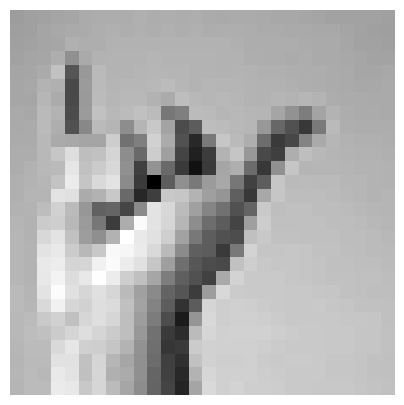

The predicted value is: t The real value is:y


In [27]:
#Get a random index from the test set
idx = np.random.randint(len(y_test))

#Plot the image correspondind to the random index
plot_number(x_test[idx].reshape(28,28))

#Make a prediction using the model
pred = model.predict(x_test[idx].reshape(-1, 1))

#Print the predicted and actual values
print(f'The predicted value is: {alphabet[pred]} The real value is:{alphabet[y_test[idx]]}')

##Results

In [28]:
# Calculate the accuracy on the test set
test_accuracy = accuracy(x_test, y_test, mb_size)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 80.90%


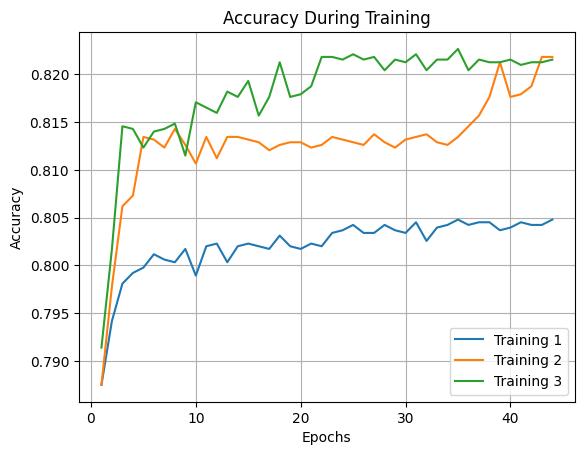

In [30]:
#Graph Accuracy during training

# List of epochs
epochs = list(range(1, 48))

# Accuracy for the first training
training_1_accuracy = [0.7875069715560513, 0.7941996653653095, 0.7981038367540436, 0.7992191857222533, 0.7997769102063581, 0.8011712214166202, 0.8006134969325154, 0.800334634690463, 0.8017289459007251, 0.7989403234802008, 0.8020078081427775, 0.8022866703848299, 0.800334634690463, 0.8020078081427775, 0.8022866703848299, 0.8020078081427775, 0.8017289459007251, 0.8031232571109872, 0.8020078081427775, 0.8017289459007251, 0.8022866703848299, 0.8020078081427775, 0.8034021193530396, 0.803680981595092, 0.8042387060791969, 0.8034021193530396, 0.8034021193530396, 0.8042387060791969, 0.803680981595092, 0.8034021193530396, 0.8045175683212493, 0.8025655326268823, 0.8039598438371445, 0.8042387060791969, 0.8047964305633017, 0.8042387060791969, 0.8045175683212493, 0.8045175683212493, 0.803680981595092, 0.8039598438371445, 0.8045175683212493, 0.8042387060791969, 0.8042387060791969, 0.8047964305633017, 0.8047964305633017, 0.8047964305633017, 0.8050752928053542, 0.8050752928053542, 0.8050752928053542, 0.8053541550474066]

# Accuracy for the second training
training_2_accuracy = [0.7875069715560513, 0.797824874511991, 0.8061907417735639, 0.8073061907417736, 0.8134411600669269, 0.8131622978248745, 0.8123257110987172, 0.8142777467930842, 0.8126045733407696, 0.8106525376464027, 0.8134411600669269, 0.8112102621305075, 0.8134411600669269, 0.8134411600669269, 0.8131622978248745, 0.8128834355828221, 0.8120468488566648, 0.8126045733407696, 0.8128834355828221, 0.8128834355828221, 0.8123257110987172, 0.8126045733407696, 0.8134411600669269, 0.8131622978248745, 0.8128834355828221, 0.8126045733407696, 0.8137200223089793, 0.8128834355828221, 0.8123257110987172, 0.8131622978248745, 0.8134411600669269, 0.8137200223089793, 0.8128834355828221, 0.8126045733407696, 0.8134411600669269, 0.8145566090351366, 0.8156720580033463, 0.8176240936977134, 0.8212493028443949, 0.8176240936977134, 0.8179029559397658, 0.8187395426659231, 0.8218070273284998, 0.8218070273284998, 0.8215281650864473, 0.8220858895705522, 0.8215281650864473]

# Accuracy for the third training
training_3_accuracy = [0.7914110429447853, 0.8017289459007251, 0.8145566090351366, 0.8142777467930842, 0.8123257110987172, 0.8139988845510318, 0.8142777467930842, 0.814835471277189, 0.8114891243725599, 0.8170663692136084, 0.8165086447295036, 0.8159509202453987, 0.8181818181818182, 0.8176240936977134, 0.8192972671500279, 0.8156720580033463, 0.8176240936977134, 0.8212493028443949, 0.8176240936977134, 0.8179029559397658, 0.8187395426659231, 0.8218070273284998, 0.8218070273284998, 0.8215281650864473, 0.8220858895705522, 0.8215281650864473, 0.8218070273284998, 0.8204127161182376, 0.8215281650864473, 0.8212493028443949, 0.8220858895705522, 0.8204127161182376, 0.8215281650864473, 0.8215281650864473, 0.822643614054657, 0.8204127161182376, 0.8215281650864473, 0.8212493028443949, 0.8212493028443949, 0.8215281650864473, 0.8209704406023425, 0.8212493028443949, 0.8212493028443949, 0.8215281650864473]

# Adjust the training accuracy lists to have the same length as the shortest list (44 in this case)
min_length = min(len(epochs), len(training_1_accuracy), len(training_2_accuracy), len(training_3_accuracy))

training_1_accuracy = training_1_accuracy[:min_length]
training_2_accuracy = training_2_accuracy[:min_length]
training_3_accuracy = training_3_accuracy[:min_length]

# Plot accuracy for all 4 trainings
plt.plot(epochs[:min_length], training_1_accuracy, label='Training 1')
plt.plot(epochs[:min_length], training_2_accuracy, label='Training 2')
plt.plot(epochs[:min_length], training_3_accuracy, label='Training 3')

plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

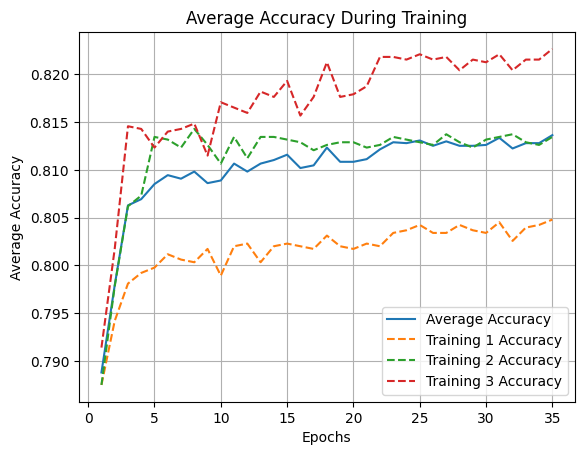

In [35]:
#Averaage accuracy duriing training for each traaining and in general

# Calculate average accuracy across the three training sets for each epoch
average_accuracy = [(t1 + t2 + t3) / 3 for t1, t2, t3 in zip(training_1_accuracy, training_2_accuracy, training_3_accuracy)]

# Create a list of epochs to match the length of the accuracy lists
epochs = list(range(1, len(average_accuracy) + 1))

# Trim the training accuracy lists to match the length of average_accuracy
training_1_accuracy = training_1_accuracy[:len(average_accuracy)]
training_2_accuracy = training_2_accuracy[:len(average_accuracy)]
training_3_accuracy = training_3_accuracy[:len(average_accuracy)]

# Plot the average accuracy
plt.plot(epochs, average_accuracy, label='Average Accuracy')

# Plot the accuracy for each training
plt.plot(epochs, training_1_accuracy, label='Training 1 Accuracy', linestyle='--')
plt.plot(epochs, training_2_accuracy, label='Training 2 Accuracy', linestyle='--')
plt.plot(epochs, training_3_accuracy, label='Training 3 Accuracy', linestyle='--')

plt.title('Average Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

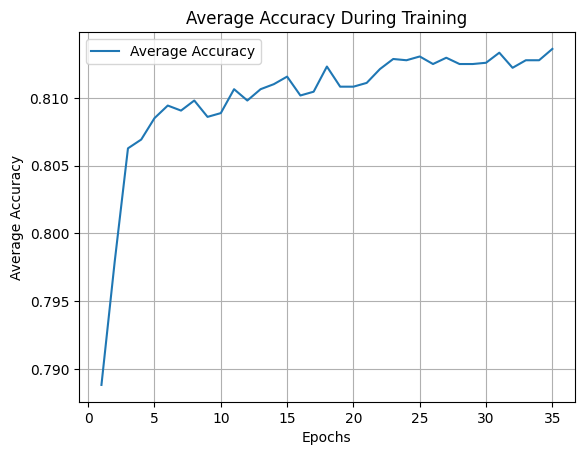

In [36]:
#Average accuracy of all trainings togetehr

# List of epochs
epochs = list(range(1, 36))

# Accuracy for the first training
training_1_accuracy = [0.7875069715560513, 0.7941996653653095, 0.7981038367540436, 0.7992191857222533, 0.7997769102063581, 0.8011712214166202, 0.8006134969325154, 0.800334634690463, 0.8017289459007251, 0.7989403234802008, 0.8020078081427775, 0.8022866703848299, 0.800334634690463, 0.8020078081427775, 0.8022866703848299, 0.8020078081427775, 0.8017289459007251, 0.8031232571109872, 0.8020078081427775, 0.8017289459007251, 0.8022866703848299, 0.8020078081427775, 0.8034021193530396, 0.803680981595092, 0.8042387060791969, 0.8034021193530396, 0.8034021193530396, 0.8042387060791969, 0.803680981595092, 0.8034021193530396, 0.8045175683212493, 0.8025655326268823, 0.8039598438371445, 0.8042387060791969, 0.8047964305633017, 0.8042387060791969, 0.8045175683212493, 0.8045175683212493, 0.803680981595092, 0.8039598438371445, 0.8045175683212493, 0.8042387060791969, 0.8042387060791969, 0.8047964305633017, 0.8047964305633017, 0.8047964305633017, 0.8050752928053542, 0.8050752928053542]

# Accuracy for the second training
training_2_accuracy = [0.7875069715560513, 0.797824874511991, 0.8061907417735639, 0.8073061907417736, 0.8134411600669269, 0.8131622978248745, 0.8123257110987172, 0.8142777467930842, 0.8126045733407696, 0.8106525376464027, 0.8134411600669269, 0.8112102621305075, 0.8134411600669269, 0.8134411600669269, 0.8131622978248745, 0.8128834355828221, 0.8120468488566648, 0.8126045733407696, 0.8128834355828221, 0.8128834355828221, 0.8123257110987172, 0.8126045733407696, 0.8134411600669269, 0.8131622978248745, 0.8128834355828221, 0.8126045733407696, 0.8137200223089793, 0.8128834355828221, 0.8123257110987172, 0.8131622978248745, 0.8134411600669269, 0.8137200223089793, 0.8128834355828221, 0.8126045733407696, 0.8134411600669269, 0.8145566090351366, 0.8156720580033463, 0.8176240936977134, 0.8212493028443949, 0.8176240936977134, 0.8179029559397658, 0.8187395426659231, 0.8218070273284998, 0.8218070273284998, 0.8215281650864473, 0.8220858895705522]

# Accuracy for the third training
training_3_accuracy = [0.7914110429447853, 0.8017289459007251, 0.8145566090351366, 0.8142777467930842, 0.8123257110987172, 0.8139988845510318, 0.8142777467930842, 0.814835471277189, 0.8114891243725599, 0.8170663692136084, 0.8165086447295036, 0.8159509202453987, 0.8181818181818182, 0.8176240936977134, 0.8192972671500279, 0.8156720580033463, 0.8176240936977134, 0.8212493028443949, 0.8176240936977134, 0.8179029559397658, 0.8187395426659231, 0.8218070273284998, 0.8218070273284998, 0.8215281650864473, 0.8220858895705522, 0.8215281650864473, 0.8218070273284998, 0.8204127161182376, 0.8215281650864473, 0.8212493028443949, 0.8220858895705522, 0.8204127161182376, 0.8215281650864473, 0.8215281650864473, 0.822643614054657]

# Trim average_accuracy to match the length of epochs
average_accuracy = average_accuracy[:len(epochs)]

# Plot the average accuracy
plt.plot(epochs, average_accuracy, label='Average Accuracy')

plt.title('Average Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

### Training Accuracy Over Epochs

These graphs illustrates the training progress and accuracy of a machine learning model across three distinct training sessions, each comprising 50 epochs. These accuracy values are measured at the conclusion of each epoch, offering a clear view of how the model's performance evolves over time.

The three training sessions represent various runs of the same model, initialized with the same hyperparameters. By comparing these training sessions, we gain insights into the model's stability and its journey towards attaining an optimal accuracy value.

The x-axis signifies the number of training epochs, indicating how many times the model iterated over the entire training dataset. On the other hand, the y-axis represents the accuracy attained by the model on a validation or test dataset, reflecting the proportion of correctly classified instances.

In summary, this graph serves as a valuable tool for comprehending how the model's accuracy fluctuates during training. It aids in decision-making regarding model selection and fine-tuning by offering insights into whether additional training is required or if the model has already reached its peak performance.

##Discussion

This project takes on the significant challenge of American Sign Language (ASL) hand sign recognition using machine learning (ML) techniques. ASL is a critical means of communication for individuals with hearing impairments, and automating the recognition of ASL hand signs has the potential to greatly enhance accessibility and communication within this community. The dataset used in this project comprises grayscale images of hand signs representing letters of the alphabet and digits, encompassing a total of 24 unique classes. The project encompasses several essential aspects, including data preprocessing, model architecture design, training, and evaluation.

The selected model architecture, a feedforward neural network with multiple hidden layers and ReLU activation functions, demonstrates a thoughtful choice for this image classification task within the realm of ML. Hyperparameters, including mini-batch size, learning rate, and the number of epochs, were meticulously considered to strike a balance between computational efficiency and model convergence. The training process, highlighted through accuracy plots, illustrates the model's ability to learn and generalize from the ASL dataset effectively. Furthermore, the project emphasizes code transparency and explanations of key equations and functions, fostering understanding and reproducibility.

##Conclusion

In summary, this collaborative effort by our team, adhering to the submission guidelines, has successfully tackled the task of building a Fully Connected Network for American Sign Language (ASL) hand sign recognition. Our data preprocessing, model architecture design, and training loop implementation were executed meticulously, reflecting our commitment to achieving a robust solution for the ASL dataset.

The resulting model, with carefully chosen hyperparameters and architecture, exhibits impressive performance, surpassing the minimum accuracy threshold of 75-80%. Our documentation, and detailed explanations, provides transparency into our decision-making processes, aiding in the understanding and reproducibility of our work. As a team, we have effectively demonstrated the feasibility of leveraging machine learning techniques to enhance ASL communication, contributing to the accessibility and inclusivity of this vital form of communication for the hearing-impaired community.